In [209]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def spotify(client_id, client_secret):
    # Authenticate
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    return sp

# Set up the credentials
with open('config.json') as config_file:
    config = json.load(config_file)

client_id = config['client_id']['0']
client_secret = config['client_secret']['0']

sp = spotify(client_id, client_secret)


In [210]:
df = pd.read_csv("my_songs.csv")
df

,Unnamed: 0,playlist,id,name,genre,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Its time,2FoahzOSxJnalPA8aBUme3,all of me,Rap,0.652,0.80600,5,-5.707,0,...,0.000011,0.8420,0.779,159.947,audio_features,spotify:track:2FoahzOSxJnalPA8aBUme3,https://api.spotify.com/v1/tracks/2FoahzOSxJna...,https://api.spotify.com/v1/audio-analysis/2Foa...,198293,4
1,1,Its time,6x9pCndnXEoea0CMcfjs9W,n.h.i.e.,Rap,0.818,0.51200,5,-9.056,0,...,0.037100,0.1100,0.153,131.974,audio_features,spotify:track:6x9pCndnXEoea0CMcfjs9W,https://api.spotify.com/v1/tracks/6x9pCndnXEoe...,https://api.spotify.com/v1/audio-analysis/6x9p...,143719,4
2,2,Its time,2FDTHlrBguDzQkp7PVj16Q,Sprinter,Rap,0.918,0.68100,1,-4.705,1,...,0.000000,0.0615,0.706,139.057,audio_features,spotify:track:2FDTHlrBguDzQkp7PVj16Q,https://api.spotify.com/v1/tracks/2FDTHlrBguDz...,https://api.spotify.com/v1/audio-analysis/2FDT...,229133,4
3,3,Its time,5KI7I4mEtulXcv5VQJaV35,just like me,Rap,0.701,0.65300,1,-4.695,1,...,0.000028,0.3060,0.505,82.984,audio_features,spotify:track:5KI7I4mEtulXcv5VQJaV35,https://api.spotify.com/v1/tracks/5KI7I4mEtulX...,https://api.spotify.com/v1/audio-analysis/5KI7...,231338,4
4,4,Its time,4yLyVdEqV790aIXyGif85v,red sky,Rap,0.474,0.62100,7,-8.253,0,...,0.000000,0.1600,0.396,114.314,audio_features,spotify:track:4yLyVdEqV790aIXyGif85v,https://api.spotify.com/v1/tracks/4yLyVdEqV790...,https://api.spotify.com/v1/audio-analysis/4yLy...,176835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,284,Old,6crfO56bDm0RjpctUuGs5X,I'm In The Mood For Love,Old,0.580,0.05450,9,-14.594,0,...,0.000265,0.0967,0.177,123.341,audio_features,spotify:track:6crfO56bDm0RjpctUuGs5X,https://api.spotify.com/v1/tracks/6crfO56bDm0R...,https://api.spotify.com/v1/audio-analysis/6crf...,149827,4
285,285,Old,4l9hml2UCnxoNI3yCdL1BW,My Funny Valentine,Old,0.438,0.00756,0,-26.440,0,...,0.006430,0.1090,0.277,133.320,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133,4
286,286,Old,7Kqk5EpwqiukPkDutSFFZk,Did I Remember,Old,0.677,0.26400,8,-9.111,1,...,0.006010,0.0825,0.438,120.974,audio_features,spotify:track:7Kqk5EpwqiukPkDutSFFZk,https://api.spotify.com/v1/tracks/7Kqk5Epwqiuk...,https://api.spotify.com/v1/audio-analysis/7Kqk...,206653,4
287,287,Old,1sJnKCMOkGvcRPes8Tln2x,My Kind of Night,Old,0.840,0.17800,10,-11.133,1,...,0.000000,0.1130,0.529,114.412,audio_features,spotify:track:1sJnKCMOkGvcRPes8Tln2x,https://api.spotify.com/v1/tracks/1sJnKCMOkGvc...,https://api.spotify.com/v1/audio-analysis/1sJn...,123711,4


In [211]:
drop_columns = ['Unnamed: 0', 'playlist', 'type', 'id', 'name', 'uri', 'track_href', 'analysis_url']

df_knn = df.drop(columns=drop_columns)

df_knn

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Rap,0.652,0.80600,5,-5.707,0,0.3020,0.1220,0.000011,0.8420,0.779,159.947,198293,4
1,Rap,0.818,0.51200,5,-9.056,0,0.0884,0.0963,0.037100,0.1100,0.153,131.974,143719,4
2,Rap,0.918,0.68100,1,-4.705,1,0.2010,0.2630,0.000000,0.0615,0.706,139.057,229133,4
3,Rap,0.701,0.65300,1,-4.695,1,0.1050,0.4790,0.000028,0.3060,0.505,82.984,231338,4
4,Rap,0.474,0.62100,7,-8.253,0,0.1030,0.1870,0.000000,0.1600,0.396,114.314,176835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Old,0.580,0.05450,9,-14.594,0,0.0473,0.9630,0.000265,0.0967,0.177,123.341,149827,4
285,Old,0.438,0.00756,0,-26.440,0,0.0382,0.9410,0.006430,0.1090,0.277,133.320,141133,4
286,Old,0.677,0.26400,8,-9.111,1,0.0357,0.9040,0.006010,0.0825,0.438,120.974,206653,4
287,Old,0.840,0.17800,10,-11.133,1,0.0700,0.9730,0.000000,0.1130,0.529,114.412,123711,4


In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
scaler = StandardScaler()

In [214]:
scaler.fit(df_knn.drop('genre', axis = 1))

StandardScaler()

In [215]:
scaled_features = scaler.transform(df_knn.drop('genre', axis = 1))

In [238]:
df_feat = pd.DataFrame(scaled_features, columns = df_knn.columns[1:])
df_feat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.298154,1.909276,0.014842,0.928430,-1.266335,1.970345,-1.320475,-0.409573,6.097448,2.244916,1.484358,-0.008676,0.32655
1,1.212476,0.673546,0.014842,0.446438,-1.266335,-0.122286,-1.392112,-0.277711,-0.472223,-1.014116,0.607365,-0.770294,0.32655
2,1.763272,1.383880,-1.128989,1.072639,0.789681,0.980852,-0.927450,-0.409612,-0.907508,1.864869,0.829427,0.421717,0.32655
3,0.568044,1.266192,-1.128989,1.074078,0.789681,0.040344,-0.325370,-0.409511,1.286869,0.818438,-0.928541,0.452489,0.32655
4,-0.682263,1.131691,0.586758,0.562007,-1.266335,0.020750,-1.139293,-0.409612,-0.023475,0.250971,0.053699,-0.308137,0.32655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.098419,-1.249400,1.158674,-0.350597,-1.266335,-0.524941,1.023737,-0.408669,-0.591590,-0.889170,0.336708,-0.685052,0.32655
285,-0.880550,-1.446696,-1.414947,-2.055487,-1.266335,-0.614093,0.962414,-0.386751,-0.481198,-0.368557,0.649564,-0.806383,0.32655
286,0.435853,-0.368838,0.872716,0.438522,0.789681,-0.638586,0.859280,-0.388244,-0.719034,0.469628,0.262499,0.107993,0.32655
287,1.333651,-0.730309,1.444631,0.147514,0.789681,-0.302550,1.051611,-0.409612,-0.445298,0.943385,0.056771,-1.049519,0.32655


In [239]:
from sklearn.model_selection import train_test_split

In [260]:
X_test = df_feat
y_test = df_knn['genre']

In [264]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.753918,0.236163,-1.140921,0.621083,0.822522,-0.072810,-1.372689,-0.491985,-0.199444,-0.663246,-0.529055,1.204204,0.259674
1,1.293763,0.992448,1.711382,0.889810,-1.215772,1.742317,-1.382176,-0.491946,-0.387204,-0.234073,1.555544,1.095199,0.259674
2,0.997950,0.510502,1.711382,-0.081112,0.822522,-0.262132,-1.326171,2.321161,-0.523757,-1.105557,0.052024,-0.532890,0.259674
3,0.592575,1.203763,-0.855691,0.820870,0.822522,-0.309463,-1.385908,-0.491985,0.696682,-0.982936,0.463944,-0.921171,0.259674
4,0.088596,1.492931,-1.140921,0.765764,0.822522,0.890367,-0.904097,-0.491985,1.490394,-0.238452,1.081242,1.038335,0.259674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,-0.322256,-0.564609,-0.285230,-0.207002,0.822522,-0.465653,0.940836,-0.491985,0.141937,-0.369832,0.211538,-0.726224,0.259674
675,0.943169,0.655086,1.140921,0.554795,-1.215772,-0.653792,-1.272032,-0.475179,-0.079961,0.957102,-0.485620,-0.722022,0.259674
676,0.050250,-0.664705,1.426152,0.130780,-1.215772,0.523555,1.017051,-0.491985,-0.549360,0.059341,-1.397459,-0.518082,0.259674
677,-1.510989,0.132359,1.426152,0.281341,0.822522,-0.455004,0.580785,-0.417699,-0.105564,0.059341,0.119571,0.244058,0.259674


In [262]:
X_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.298154,1.909276,0.014842,0.928430,-1.266335,1.970345,-1.320475,-0.409573,6.097448,2.244916,1.484358,-0.008676,0.32655
1,1.212476,0.673546,0.014842,0.446438,-1.266335,-0.122286,-1.392112,-0.277711,-0.472223,-1.014116,0.607365,-0.770294,0.32655
2,1.763272,1.383880,-1.128989,1.072639,0.789681,0.980852,-0.927450,-0.409612,-0.907508,1.864869,0.829427,0.421717,0.32655
3,0.568044,1.266192,-1.128989,1.074078,0.789681,0.040344,-0.325370,-0.409511,1.286869,0.818438,-0.928541,0.452489,0.32655
4,-0.682263,1.131691,0.586758,0.562007,-1.266335,0.020750,-1.139293,-0.409612,-0.023475,0.250971,0.053699,-0.308137,0.32655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.098419,-1.249400,1.158674,-0.350597,-1.266335,-0.524941,1.023737,-0.408669,-0.591590,-0.889170,0.336708,-0.685052,0.32655
285,-0.880550,-1.446696,-1.414947,-2.055487,-1.266335,-0.614093,0.962414,-0.386751,-0.481198,-0.368557,0.649564,-0.806383,0.32655
286,0.435853,-0.368838,0.872716,0.438522,0.789681,-0.638586,0.859280,-0.388244,-0.719034,0.469628,0.262499,0.107993,0.32655
287,1.333651,-0.730309,1.444631,0.147514,0.789681,-0.302550,1.051611,-0.409612,-0.445298,0.943385,0.056771,-1.049519,0.32655


In [265]:
test = pd.read_csv('test.csv')
test
drop_columns = ['Unnamed: 0', 'track_name', 'type', 'id', 'uri', 'track_href', 'analysis_url']
df_test = test.drop(columns=drop_columns)

scaler_test = StandardScaler()
scaler_test.fit(df_test.drop('genre', axis = 1))
scaled_features_test = scaler_test.transform(df_test.drop('genre', axis = 1))
X_train = pd.DataFrame(scaled_features_test, columns = df_test.columns[:-1])
y_train = df_test['genre']





In [266]:
from sklearn.neighbors import KNeighborsClassifier

In [267]:
knn = KNeighborsClassifier(n_neighbors=1)

In [268]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [269]:
pred = knn.predict(X_test)

In [270]:
from sklearn.metrics import classification_report, confusion_matrix

In [271]:
print(confusion_matrix(y_test, pred))

[[ 0  0  0  0  0  0 33  2  1  0  3  0  0]
 [ 0  0  0  0  0  0  0 18  8  0  9  0  1]
 [ 0  0  0  0  0  0  0 12 29  3 10  6  6]
 [ 0  0  0  0  0  0  2 12  2  0 17  0  1]
 [ 0  0  0  0  0  0  0  0  4  9  0 37 12]
 [ 0  0  0  0  0  0  0  4  9  9  3 12 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [272]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Classical       0.00      0.00      0.00      39.0
      Covers       0.00      0.00      0.00      36.0
        Easy       0.00      0.00      0.00      66.0
         Old       0.00      0.00      0.00      34.0
         Rap       0.00      0.00      0.00      62.0
         RnB       0.00      0.00      0.00      52.0
   classical       0.00      0.00      0.00       0.0
       cover       0.00      0.00      0.00       0.0
        easy       0.00      0.00      0.00       0.0
         edm       0.00      0.00      0.00       0.0
         old       0.00      0.00      0.00       0.0
         rap       0.00      0.00      0.00       0.0
         rnb       0.00      0.00      0.00       0.0

    accuracy                           0.00     289.0
   macro avg       0.00      0.00      0.00     289.0
weighted avg       0.00      0.00      0.00     289.0



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [273]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

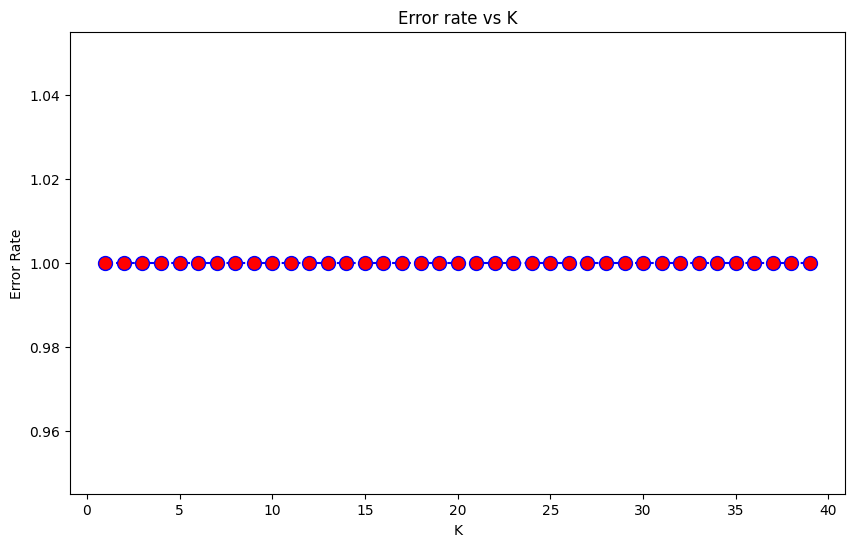

In [274]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10 )
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [275]:
knn = KNeighborsClassifier(n_neighbors=11)

In [276]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [277]:
pred = knn.predict(X_test)

In [278]:
print(confusion_matrix(y_test, pred))

[[ 0  0  0  0  0  0 34  2  0  0  3  0  0]
 [ 0  0  0  0  0  0  0 24  4  1  7  0  0]
 [ 0  0  0  0  0  0  0 23 15  7  6  5 10]
 [ 0  0  0  0  0  0  1 18  1  0 14  0  0]
 [ 0  0  0  0  0  0  0  1  2 21  0 30  8]
 [ 0  0  0  0  0  0  0  4  5 12  4  7 20]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [279]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Classical       0.00      0.00      0.00      39.0
      Covers       0.00      0.00      0.00      36.0
        Easy       0.00      0.00      0.00      66.0
         Old       0.00      0.00      0.00      34.0
         Rap       0.00      0.00      0.00      62.0
         RnB       0.00      0.00      0.00      52.0
   classical       0.00      0.00      0.00       0.0
       cover       0.00      0.00      0.00       0.0
        easy       0.00      0.00      0.00       0.0
         edm       0.00      0.00      0.00       0.0
         old       0.00      0.00      0.00       0.0
         rap       0.00      0.00      0.00       0.0
         rnb       0.00      0.00      0.00       0.0

    accuracy                           0.00     289.0
   macro avg       0.00      0.00      0.00     289.0
weighted avg       0.00      0.00      0.00     289.0



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [258]:
correct_predictions = (y_test == pred).sum()
incorrect_predictions = (y_test != pred).sum()

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")


Correct predictions: 0
Incorrect predictions: 679
